In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_classification_report, plot_confusion_matrix

In [4]:
df = pd.read_csv("../dataset/data_2c40d2w.csv") # 2 window dataset
df.head()

,mu11,mu12,mu13,mu14,mu15,mu16,mu17,mu18,mu19,mu110,...,grad22,grad23,grad24,grad25,grad26,grad27,grad28,grad29,grad210,label
0,131.579338,8.063088,-1.047255,525.389387,251.257108,190.941765,4.633137,800.540172,512.948284,964.983358,...,1.4375,0.1250,17.1250,17.1875,9.5000,0.3125,18.8125,21.2500,13.0625,A
1,59.562721,3.265270,-0.124020,311.589755,105.164608,86.858039,1.998333,428.542819,266.773064,593.225735,...,0.6250,0.1875,24.7500,10.0625,6.0625,0.1875,45.1875,21.5625,20.9375,A
2,78.161348,4.082672,0.090858,332.101740,125.539314,104.979804,2.434044,509.280025,294.737132,667.627255,...,0.8125,0.1250,23.5625,12.4375,7.4375,0.1875,35.5000,21.5625,18.0625,A
3,221.202696,13.453676,-0.900564,688.458578,393.714020,278.216078,6.689142,1031.911201,671.839044,1172.535319,...,2.3750,0.3750,11.9375,16.6250,9.6250,0.4375,9.5000,15.8125,8.0625,A
4,69.817475,3.064216,0.337623,332.132451,124.601373,104.529289,2.968333,462.369436,289.056618,660.983922,...,0.8125,0.1875,24.6875,10.9375,7.0625,0.2500,41.2500,22.2500,19.8750,A


In [5]:
X = df.drop(columns="label")
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 80), (14, 80), (56,), (14,))

In [6]:
LOOCV = LeaveOneOut()

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="minmax"), list(X.columns)),
])

pipeline_svm_linear = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel="linear", probability=True, random_state=42))
])

pipeline_svm_rbf = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel="rbf", probability=True, random_state=42))
])

svm_params = {'algo__gamma': np.array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
              'algo__C': np.array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [7]:
model_svm_linear = GridSearchCV(pipeline_svm_linear, svm_params, cv=LOOCV, n_jobs=-1);
model_svm_rbf = GridSearchCV(pipeline_svm_rbf, svm_params, cv=LOOCV, n_jobs=-1);

model_svm_linear.fit(X_train, y_train);
model_svm_rbf.fit(X_train, y_train);

# Linear SVM Model Evaluation

In [8]:
print(model_svm_linear.best_params_)
print(model_svm_linear.score(X_train, y_train), model_svm_linear.best_score_, model_svm_linear.score(X_test, y_test))

{'algo__C': 10.0, 'algo__gamma': 0.001}
0.9464285714285714 0.8214285714285714 0.7857142857142857


In [9]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_linear, report=True)

Train report
              precision    recall  f1-score   support

           A       0.93      0.96      0.95        28
           B       0.96      0.93      0.95        28

    accuracy                           0.95        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56


Test report
              precision    recall  f1-score   support

           A       0.75      0.86      0.80         7
           B       0.83      0.71      0.77         7

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.79      0.79      0.78        14



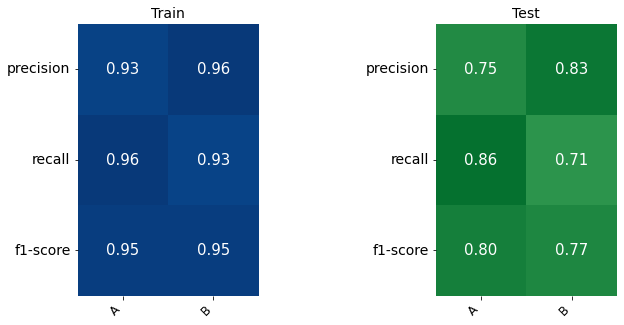

In [10]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_linear)

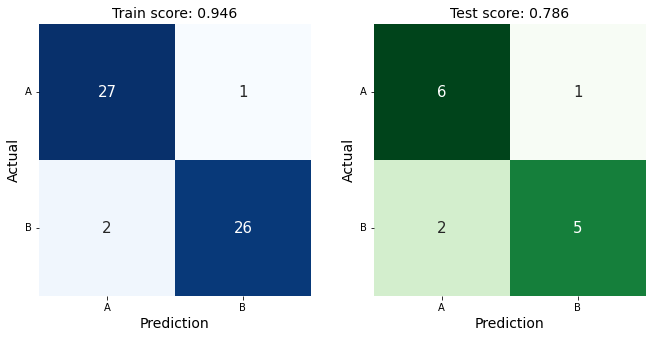

In [11]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_svm_linear)

# RBF SVM Model Evaluation

In [12]:
print(model_svm_rbf.best_params_)
print(model_svm_rbf.score(X_train, y_train), model_svm_rbf.best_score_, model_svm_rbf.score(X_test, y_test))

{'algo__C': 1000.0, 'algo__gamma': 0.01}
1.0 0.8571428571428571 0.6428571428571429


In [13]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_rbf, report=True)

Train report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        28
           B       1.00      1.00      1.00        28

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56


Test report
              precision    recall  f1-score   support

           A       0.60      0.86      0.71         7
           B       0.75      0.43      0.55         7

    accuracy                           0.64        14
   macro avg       0.68      0.64      0.63        14
weighted avg       0.67      0.64      0.63        14



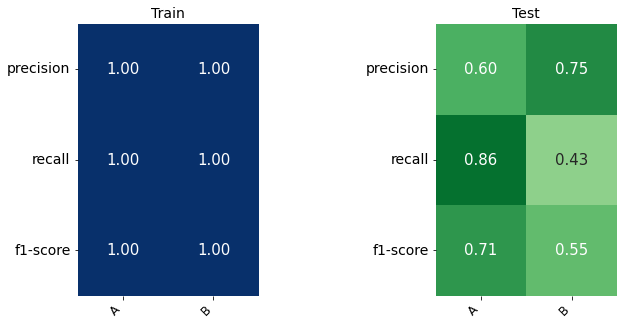

In [14]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_rbf)

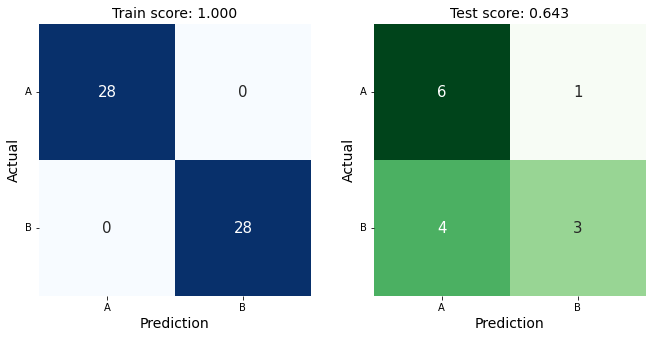

In [15]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_svm_rbf)

# Save Model

In [16]:
import pickle
import os
file_path = "../model"
os.makedirs(file_path, exist_ok=True)
pickle.dump(model_svm_linear, open(f"{file_path}/svm_linear_2w.pkl", "wb"))
pickle.dump(model_svm_rbf, open(f"{file_path}/svm_rbf_2w.pkl", "wb"))